## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
combined_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_id = combined_mouse["Mouse ID"].unique()
len(mouse_id)

249

In [3]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 
duplicate_data = ""
for j in mouse_id:
    counter = 0
    for i in np.arange(len(combined_mouse)):
        if combined_mouse["Mouse ID"][i] == j:
            counter += 1
        if counter > 10:
            duplicate_data = j

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse.loc[combined_mouse["Mouse ID"] == duplicate_data,]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = combined_mouse.loc[combined_mouse["Mouse ID"] != duplicate_data,]

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_id = clean_mouse["Mouse ID"].unique()
len(mouse_id)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
grouped_mouse = clean_mouse.groupby("Mouse ID")["Tumor Volume (mm3)"]

tumor_summary_mean_id = grouped_mouse.mean()
tumor_summary_median_id = grouped_mouse.median()
tumor_summary_var_id = grouped_mouse.var()
tumor_summary_std_id = grouped_mouse.std()
tumor_summary_sem_id = grouped_mouse.sem()
tumor_summary_id = pd.DataFrame({"mean":tumor_summary_mean_id,"median": tumor_summary_median_id,"variance":tumor_summary_var_id,\
                            "standard deviation": tumor_summary_std_id, "SEM":tumor_summary_sem_id})
# tumor_summray = tumor_summary.agg(x=("mean", grouped_mouse.mean()),y =("median", grouped_mouse.median()),\
#                                   z = ("variance",grouped_mouse.var()))

tumor_summary_id
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_mouse = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"]

tumor_summary_mean_drug = grouped_mouse.mean()
tumor_summary_median_drug = grouped_mouse.median()
tumor_summary_var_drug = grouped_mouse.var()
tumor_summary_std_drug = grouped_mouse.std()
tumor_summary_sem_drug = grouped_mouse.sem()
tumor_summary_drug = pd.DataFrame({"mean":tumor_summary_mean_drug,"median": tumor_summary_median_drug,"variance":tumor_summary_var_drug,\
                            "standard deviation": tumor_summary_std_drug, "SEM":tumor_summary_sem_drug})
tumor_summary_drug

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mouse = clean_mouse.groupby("Drug Regimen")
# Using the aggregation method, produce the same summary statistics in a single line
#{Tummor Vol : }
grouped_mouse["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

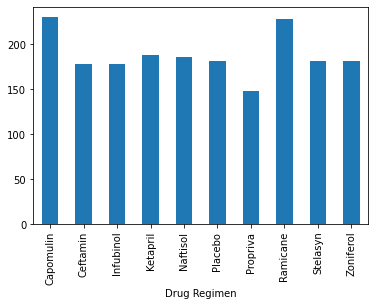

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#use counts of time points
grouped_mouse.count()["Tumor Volume (mm3)"].plot(kind = "bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

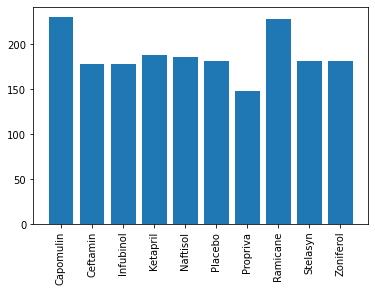

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_data = grouped_mouse.count()["Tumor Volume (mm3)"].tolist()
drug_data = grouped_mouse.count()["Tumor Volume (mm3)"].reset_index()["Drug Regimen"].tolist()
plt.bar(drug_data,mouse_data)
plt.xticks(rotation=90)

array([<AxesSubplot:ylabel='mice'>], dtype=object)

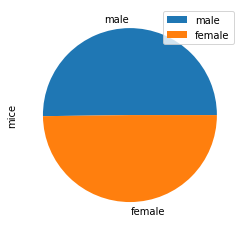

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = combined_mouse.groupby(["Mouse ID" , "Sex"])
piechart_data = sex_group.count().reset_index()["Sex"].value_counts().tolist()
df = pd.DataFrame({'mice': piechart_data}
                 ,index = ["male", "female"])
df.plot(kind = "pie",subplots = True)

([<matplotlib.patches.Wedge at 0x21a0db5a910>,
 [Text(-0.0069391759767656585, 1.0999781124353174, ''),
  Text(0.006939175976765524, -1.0999781124353174, '')])

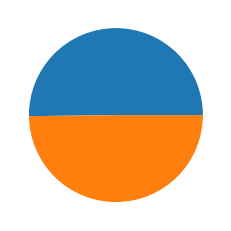

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piechart_data = sex_group.count().reset_index()["Sex"].value_counts().tolist()
plt.pie(piechart_data)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_mouse.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_vol = pd.merge(max_time, clean_mouse, on=(["Mouse ID", "Timepoint"]))
final_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)
drug = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_vol_data = []

# Create empty list to fill with tumor vol data (for plotting)
for i in drug:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    curr_drug = final_vol.loc[final_vol["Drug Regimen"] == i, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(curr_drug)
    # Determine outliers using upper and lower bounds
    quartiles = curr_drug.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #display results
    print(f"For {i}: below {lower_bound} and above {upper_bound} are considered outliers.")

For Capomulin: below 20.70456164999999 and above 51.83201549 are considered outliers.
For Ramicane: below 17.912664470000003 and above 54.30681135 are considered outliers.
For Infubinol: below 36.83290494999999 and above 82.74144559000001 are considered outliers.
For Ceftamin: below 25.355449580000002 and above 87.66645829999999 are considered outliers.


([<matplotlib.axis.XTick at 0x21a0db8de20>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

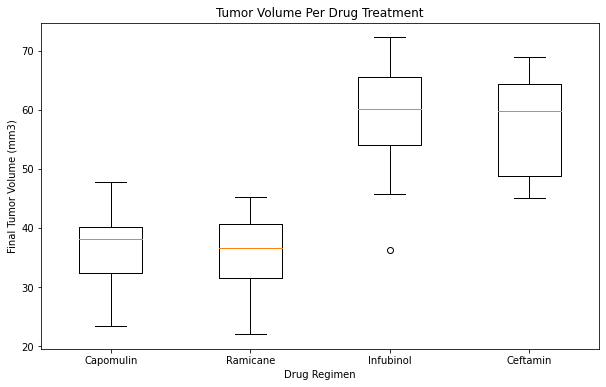

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots(figsize=(10,6)) 
ax1.boxplot(tumor_vol_data)
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

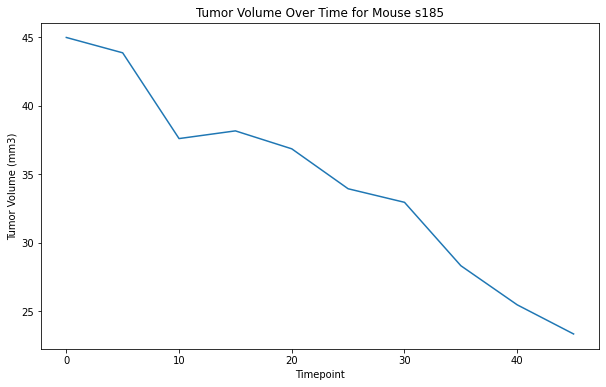

In [16]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capo_mouse = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
s185 = capo_mouse.loc[capo_mouse["Mouse ID"] == "s185"]
fig1,ax1 = plt.subplots(figsize=(10,6))
#make x & y axes
cap_xaxis = s185["Timepoint"]
cap_yaxis = s185["Tumor Volume (mm3)"]
plt.plot(cap_xaxis, cap_yaxis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse s185")
plt.show()

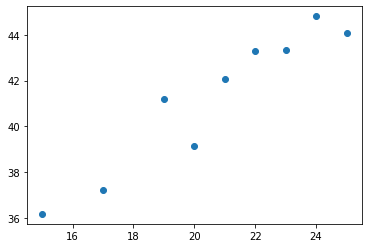

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumorVsWeight = capo_mouse.groupby("Weight (g)").mean()
tumor = pd.DataFrame(tumorVsWeight["Tumor Volume (mm3)"])
#tumor.values.tolist()
tumor = tumor.reset_index()
x = tumor["Tumor Volume (mm3)"].tolist()
y = tumor["Weight (g)"].tolist()
plt.scatter(y,x)

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694719
y = 0.95x + 21.55


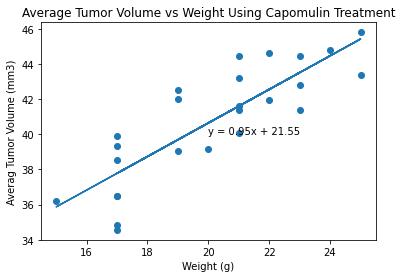

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_mouse = capo_mouse.groupby(["Mouse ID"]).mean()
capo_mouse.keys()
corcoef = st.pearsonr(capo_mouse['Weight (g)'], capo_mouse['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {corcoef}")
plt.scatter(capo_mouse['Weight (g)'],capo_mouse['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

#variables for lin regression 
lin_x = capo_mouse['Weight (g)']
lin_y = capo_mouse['Tumor Volume (mm3)']

#develop equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lin_x, lin_y)
regression_y = lin_x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

#add equation & line onto plot
plt.annotate(equation, xy=(20,40))
plt.plot(lin_x,regression_y)
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()